# SCF Trust Bonus Example Implementation

*June 2023*

*Danilo Lessa Bernardineli (BlockScience)*



In [63]:
import networkx as nx
import matplotlib.pyplot as plt
from statistics import geometric_mean

## Generating an Strawman Graph

Some ideas:
- Use an NetworkX Graph Generator
- Use an fixed graph
- Use an graph inspired by past SCF results

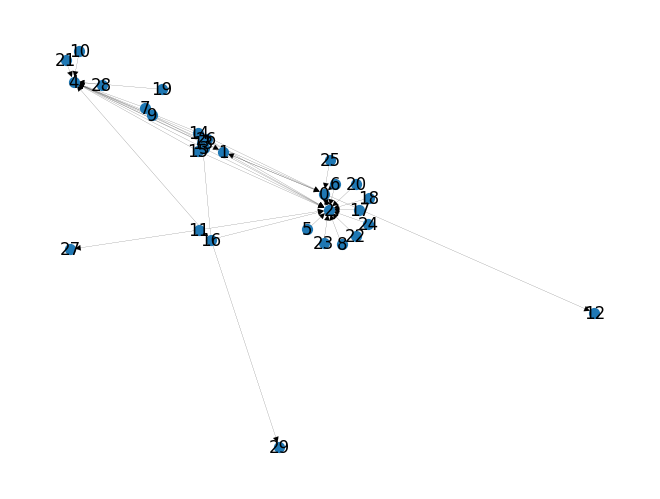

In [67]:
G = nx.DiGraph(nx.scale_free_graph(n=30, alpha=0.41, beta=0.54, gamma=0.05, delta_in=0.2, delta_out=0, seed=2717))
G.remove_edges_from(nx.selfloop_edges(G))
nx.draw(G, node_size=50, width=0.1, with_labels=True)
plt.show()

In [68]:
# Compute Personalized PageRank by taking each node as the seed.
personalized_pagerank = {}
for node in G.nodes:
    personalized_pagerank[node] = nx.pagerank(G,
                                              alpha=0.85,
                                                personalization={node: 1.0},
                                                max_iter=int(10000), 
                                                tol=1e-3,
                                                weight=1.0,
                                                #dangling={-1: 1e-15}
                                                )

# Take the Geometric Mean
raw_trust_score = {}
for node in G.nodes:
    if node == -1:
        continue
    else:
      node_pagerank_items = [vals[node]for ref_node, vals in personalized_pagerank.items()
                             if ref_node != node]
      raw_trust_score[node] = sum(node_pagerank_items) / len(node_pagerank_items)

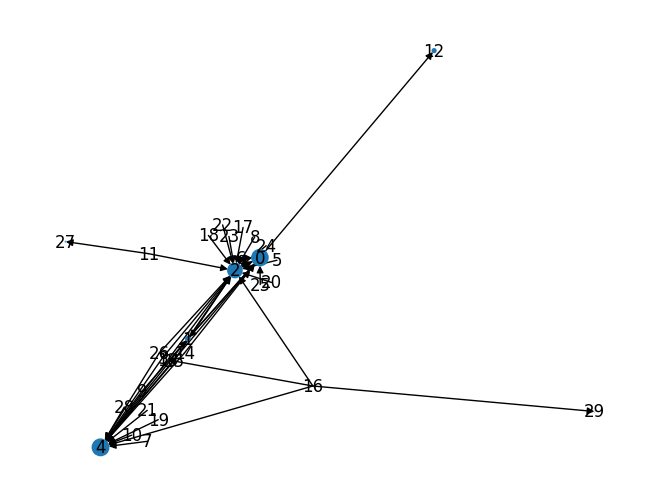

In [69]:
nx.draw(G, node_size=[v ** (2) * 5000 for v in raw_trust_score.values()], with_labels=True)
plt.show()


In [70]:
raw_trust_score

{0: 0.16497807575849519,
 1: 0.04227439656632283,
 2: 0.14519151191075064,
 3: 0.0,
 4: 0.16815801994616839,
 5: 0.0,
 6: 0.0,
 7: 0.0,
 8: 0.0,
 9: 0.0,
 10: 0.0,
 11: 0.0,
 12: 0.03854305842316615,
 13: 0.0026343299233778984,
 14: 0.0,
 15: 0.0,
 16: 0.0,
 17: 0.0,
 18: 0.0,
 19: 0.0,
 20: 0.0,
 21: 0.0,
 22: 0.0,
 23: 0.0,
 24: 0.0,
 25: 0.0,
 26: 0.0,
 27: 0.005189190445218361,
 28: 0.0,
 29: 0.0026343299233778984}